<a href="https://colab.research.google.com/github/Dharanir31/OpenAI/blob/main/Sep24_002_EDA_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 3: Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn.

In [ ]:
import pandas as pd
ti = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/EY_batch6_2ndSep24/main/titanic.csv')
ti.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


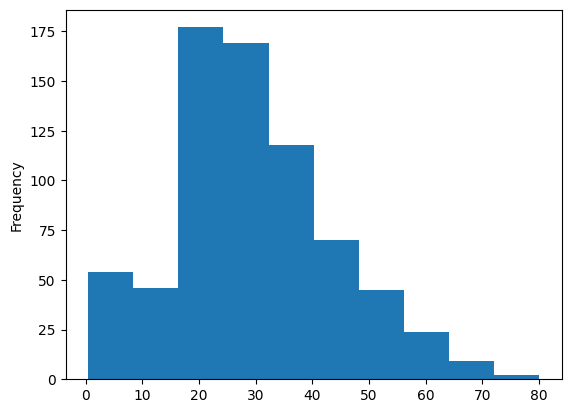

In [ ]:
ti['age'].plot(kind='hist');


Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn.

## How do I use seaborn to visualize data?

In [ ]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [ ]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
ti.isna().sum() #check for emptiness

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
ti2 = ti.select_dtypes(include=['int64','int','float64'])
ti2

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
#replace NaNs in numerical fields with the mean values
ti2=ti2.fillna(ti2.mean())

In [ ]:
ti2

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [ ]:
# fill every column with its own most frequent value
# What if instead of mean you wanted mode?
# OPTIONAL
# ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0]))

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

<ipython-input-14-e697d1f96c15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti['age'], kde=False)


<Axes: xlabel='age'>

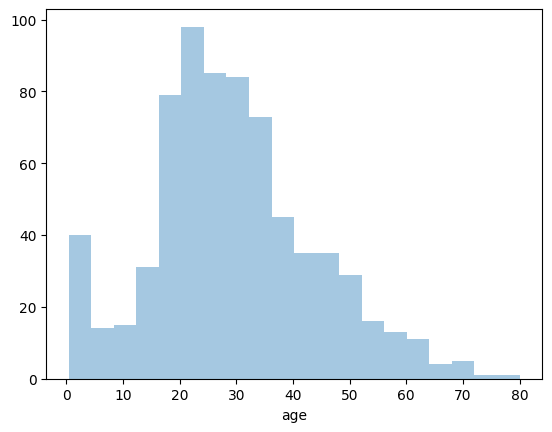

In [ ]:
sns.distplot(ti['age'], kde=False)


##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

<Axes: xlabel='age', ylabel='fare'>

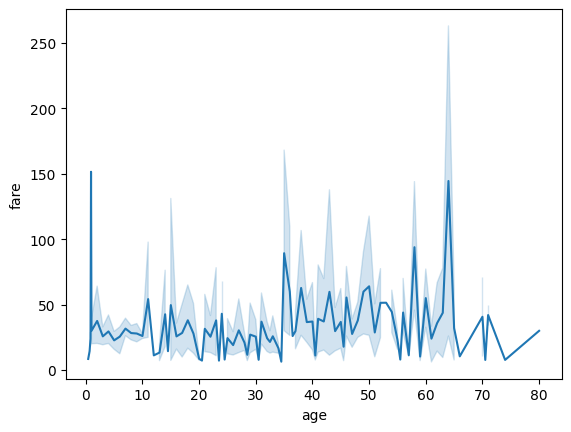

In [ ]:
sns.lineplot(x=ti['age'], y=ti['fare'])


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`...

<Axes: xlabel='age', ylabel='fare'>

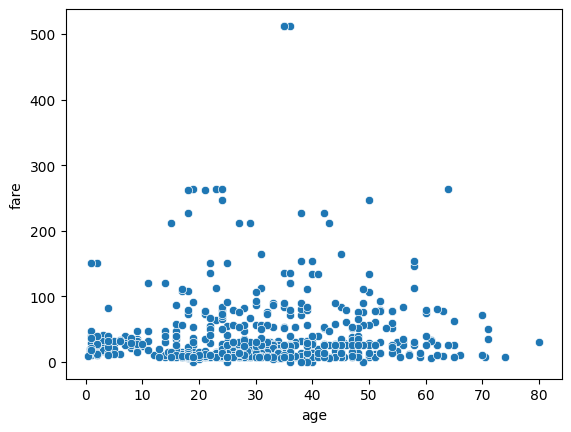

In [ ]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

<ipython-input-19-617d305977ed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti['survived'], vertical=True, kde=False)


<Axes: ylabel='survived'>

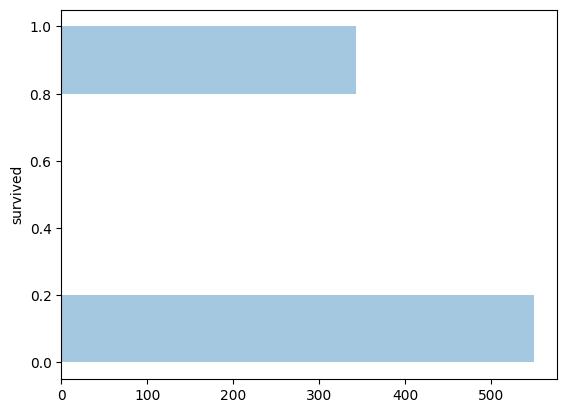

In [ ]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column...

<Axes: ylabel='age'>

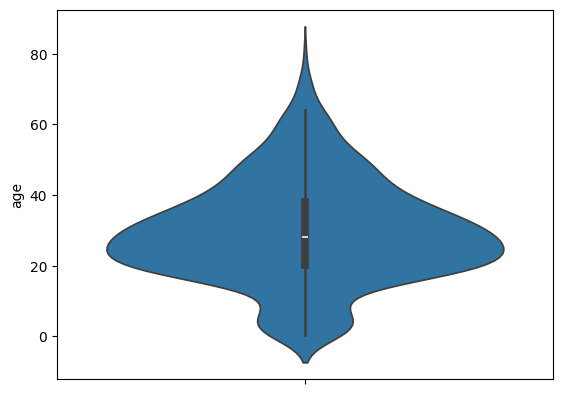

In [ ]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers.

<Axes: ylabel='age'>

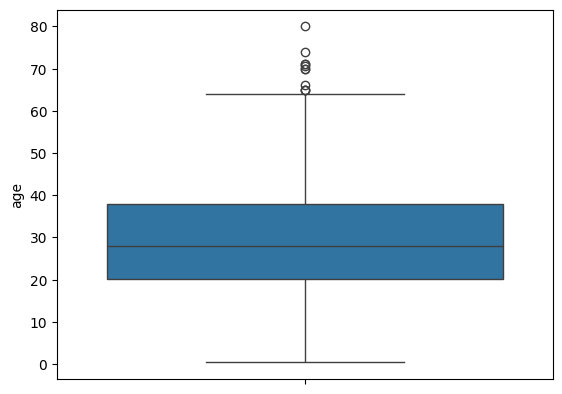

In [ ]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

<Axes: xlabel='survived', ylabel='age'>

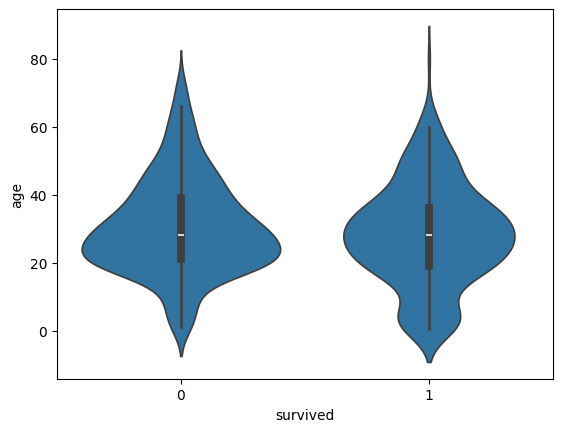

In [ ]:
sns.violinplot(data=ti, x='survived', y='age')


<Axes: xlabel='age', ylabel='embark_town'>

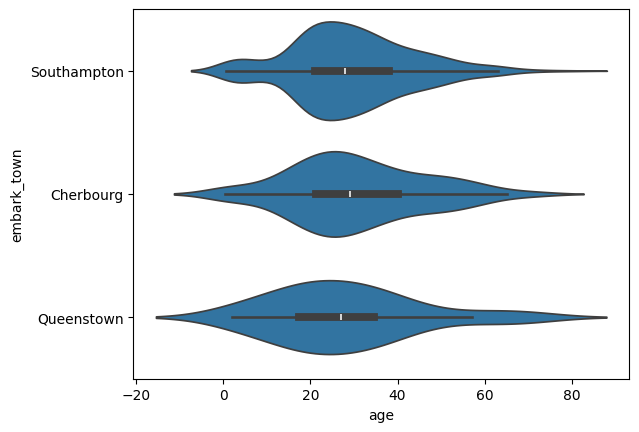

In [ ]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

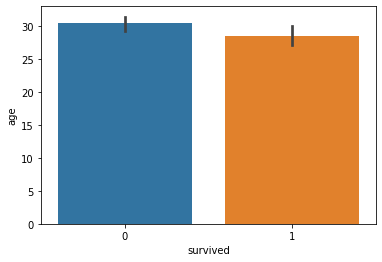

In [ ]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

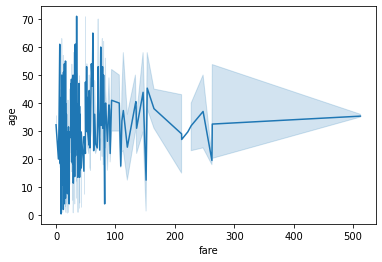

In [ ]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

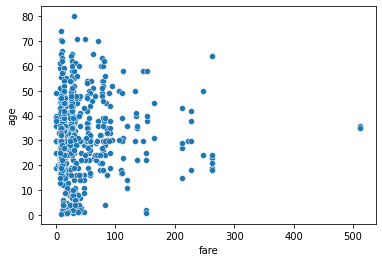

In [ ]:
sns.scatterplot(data=ti, x='fare', y='age');


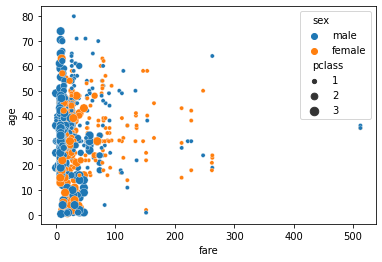

In [ ]:
sns.scatterplot(data=ti, x='fare', y='age',
                hue = 'sex',
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individual, try a few plots

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question.

### Consider:
* Univariate (single-col) plots
    * sns.distplot
        * of survived
    * sns.violinplot
        * of fare
    * sns.boxplot
        * of age

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

ti[["age","sex"]].groupby(ti.age>18).sum()

Assignment:
Step 1

<ipython-input-37-1cbd4975b22c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti['survived'], vertical=False, kde=False)


<Axes: xlabel='survived'>

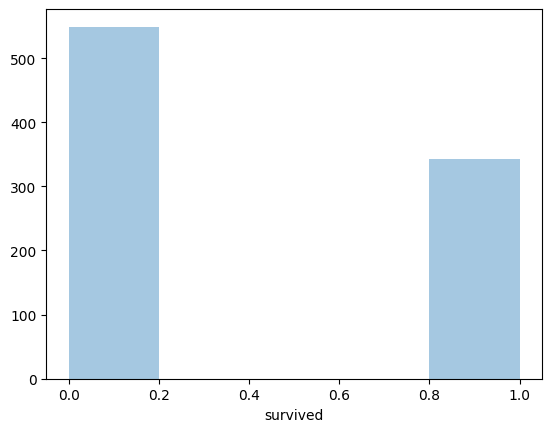

In [ ]:
sns.distplot(ti['survived'], vertical=False, kde=True)

<Axes: xlabel='fare'>

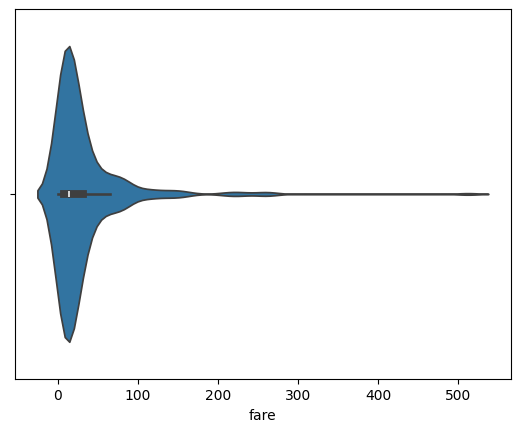

In [ ]:
sns.violinplot(data=ti, x='fare')

Step 2

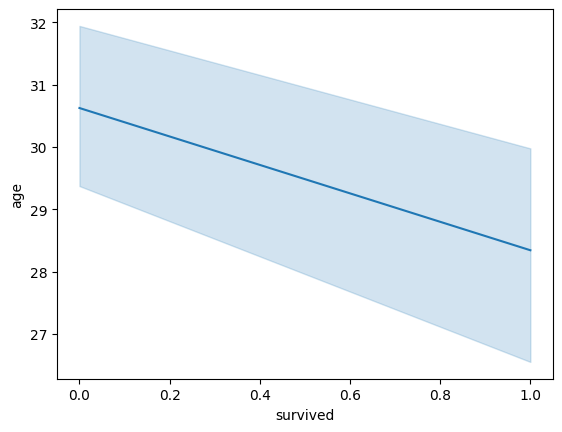

In [ ]:
sns.lineplot(data=ti, x='survived', y='age');

<Axes: xlabel='survived', ylabel='fare'>

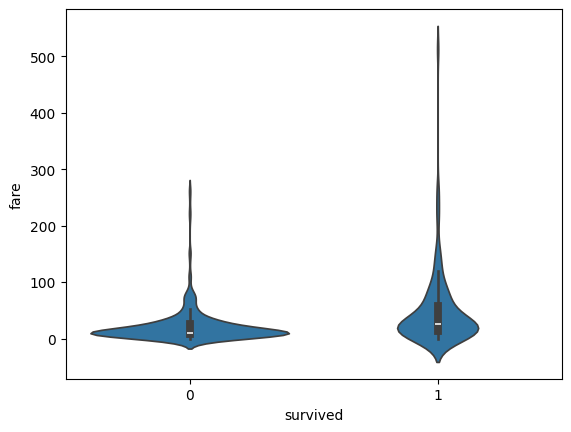

In [ ]:
sns.violinplot(data=ti, x='survived',y='fare')

<Axes: xlabel='survived', ylabel='who'>

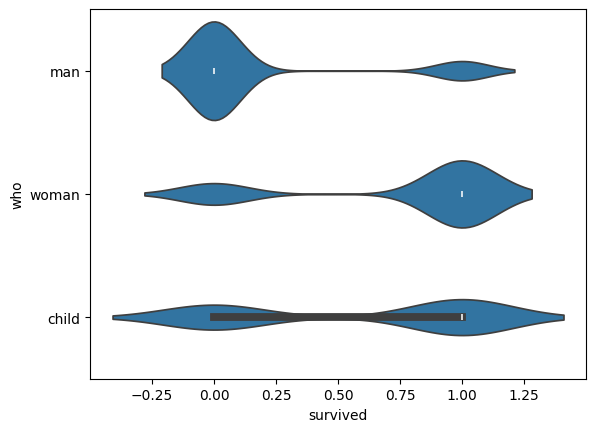

In [ ]:
sns.violinplot(data=ti, x='survived',y='who')

<Axes: xlabel='age', ylabel='survived'>

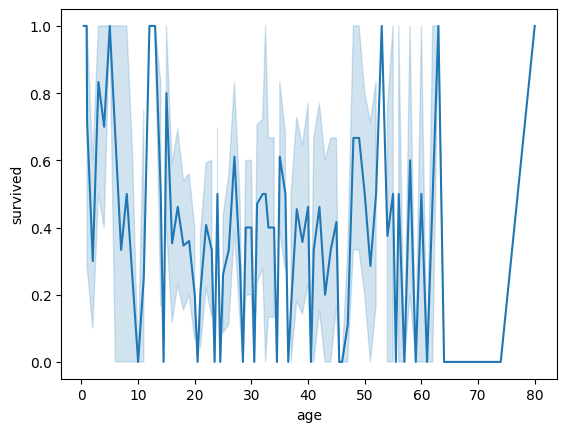

In [ ]:
ageEncoding =lambda X:1 if X>=18.0 else 0
ti['isAdult'] = ti['age'].apply(ageEncoding)
sns.lineplot(data=ti, x='age', y='survived')

<Axes: xlabel='survived', ylabel='isAdult'>

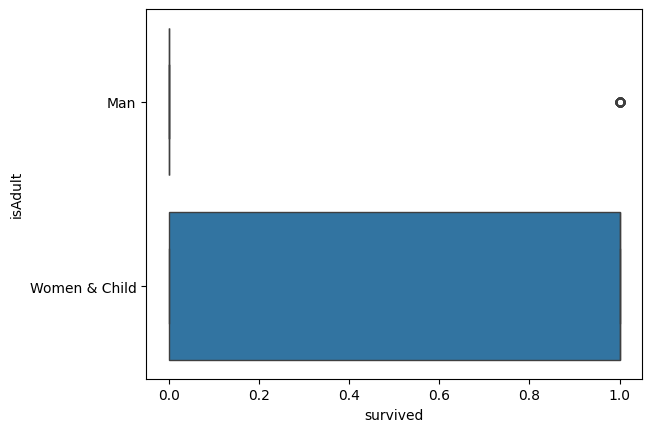

In [19]:
ageEncoding = lambda X: 'Women & Child' if X in ['woman', 'child'] else 'Man'
ti['isAdult'] = ti['who'].apply(ageEncoding)
sns.boxplot(data=ti, x='survived', y='isAdult')


<Axes: xlabel='survived', ylabel='pclass'>

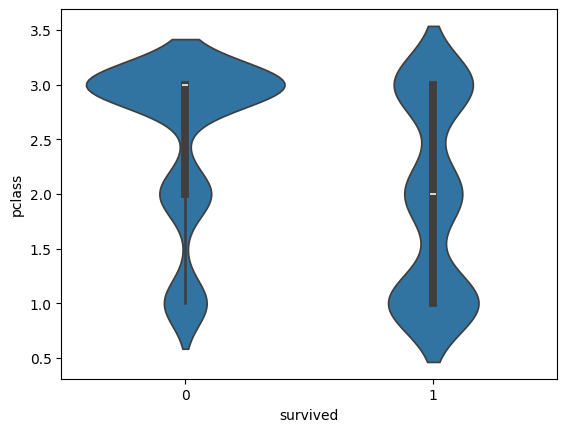

In [ ]:
sns.violinplot(data=ti, x='survived',y='pclass')

<Axes: xlabel='survived', ylabel='deck'>

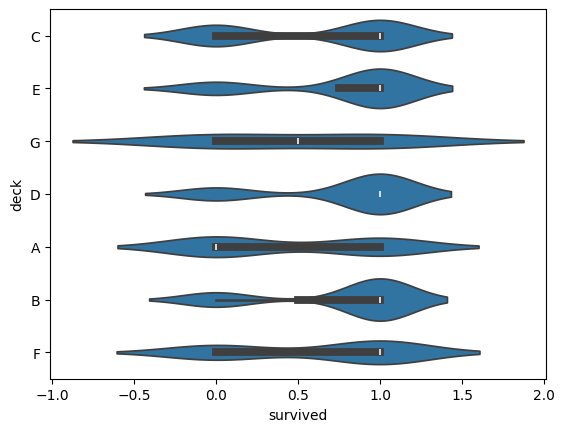

In [ ]:
sns.violinplot(data=ti, x='survived',y='deck')

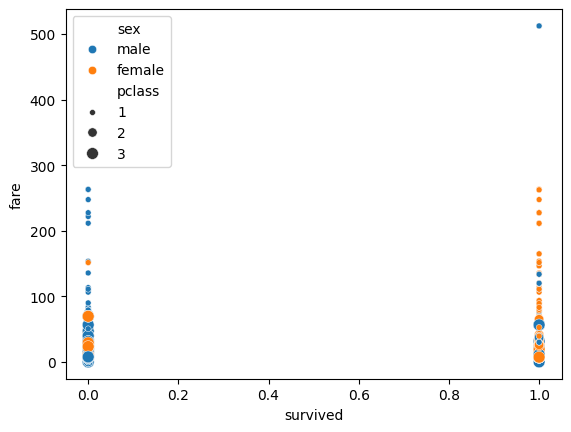

In [21]:
sns.scatterplot(data=ti, x='survived', y='fare',
                hue = 'sex',
                size = 'pclass');